<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment</b>
    
Hi, it's Sveta again. I was the reviewer on one of your previous projects, and I am going to review this one as well. 
    

I will be using the same color marking:
    
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ✔️</b>
    
Great solutions and ideas that can and should be used in the future are in green comments.   
</div>    
    
    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ⚠️</b>

Yellow color indicates what should be optimized. This is not necessary, but it will be great if you make changes to this project.
</div>      
    
    
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment ❌</b>

Issues that need to be corrected to get right results are indicated in red comments. Note that the project cannot be accepted until these issues are resolved.
</div>    

<hr>
    
**Please, use some color other than those listed to highlight answers to my comments.**
I would also ask you **not to change, move or delete my comments** so that it would be easier for me to navigate during the next review.
    
In addition, my comments are defined as headings. 
They can mess up the content; however, they are convenient, since you can immediately go to them. I will remove the headings from my comments in the next review. 
   
    
    
<hr>
    
<font color='dodgerblue'>**A few words about the project:**</font> you did a good job here, thank you so much! You compared several models and received scores, which is great. However, there are several issues we need to fix. I wrote everything in my comments. Please take a look.
    
    
    

</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 2</b>


Thank you for the updates. I've left a few comments titled as **Reviewer's comment 2**. Please take a look at these comments and the one large comment I left last time where I outlined the steps we should take. Try to follow these steps :) This project is quite hard and its description may seem confusing, so I tried to explain what we are supposed to do here. I hope my comments were useful. Anyway, please feel free to ask questions. I'm here to help. 

    

    
</div>


<div style="border-radius: 15px; border: 3px solid indigo; padding: 15px;">
<b> Reviewer's comment 3</b>


I've left new comments titled as **Reviewer's comment 3**. Please take a look :) Feel free to ask our tutors for help.

    

    
</div>

In [1]:
import pandas as pd
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import roc_auc_score

Title:

Predicting Customer Churn in Beta Bank

Introduction:

In today's competitive banking industry, retaining customers is paramount for sustainable growth and profitability. Beta Bank has noticed a concerning trend a gradual loss of customers over time. To address this issue, Beta Bank aims to predict whether a customer is likely to leave the bank soon, allowing proactive measures to retain them. By identifying customers at risk of leaving, Beta Bank can implement targeted retention strategies, ultimately reducing churn rates and enhancing customer satisfaction.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment </h2>
    
Good introduction! 
    
</div>

- Download and prepare the data. Explain the procedure.

In [2]:
data = pd.read_csv('/datasets/Churn.csv')
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0


In [3]:
data.shape

(10000, 14)

In [4]:
data.isnull().sum()

RowNumber            0
CustomerId           0
Surname              0
CreditScore          0
Geography            0
Gender               0
Age                  0
Tenure             909
Balance              0
NumOfProducts        0
HasCrCard            0
IsActiveMember       0
EstimatedSalary      0
Exited               0
dtype: int64

In [5]:
data[data["Tenure"].isna()]

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
30,31,15589475,Azikiwe,591,Spain,Female,39,NaN,0.00,3,1,0,140469.38,1
48,49,15766205,Yin,550,Germany,Male,38,NaN,103391.38,1,0,1,90878.13,0
51,52,15768193,Trevisani,585,Germany,Male,36,NaN,146050.97,2,0,0,86424.57,0
53,54,15702298,Parkhill,655,Germany,Male,41,NaN,125561.97,1,0,0,164040.94,1
60,61,15651280,Hunter,742,Germany,Male,35,NaN,136857.00,1,0,0,84509.57,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9944,9945,15703923,Cameron,744,Germany,Male,41,NaN,190409.34,2,1,1,138361.48,0
9956,9957,15707861,Nucci,520,France,Female,46,NaN,85216.61,1,1,0,117369.52,1
9964,9965,15642785,Douglas,479,France,Male,34,NaN,117593.48,2,0,0,113308.29,0
9985,9986,15586914,Nepean,659,France,Male,36,NaN,123841.49,2,1,0,96833.00,0


In [6]:
# data.dropna(subset=['Tenure'], inplace=True)
data["Tenure"].fillna(data["Tenure"].median(), inplace=True)

We noticed that only Tenure columns has missing values. It was giving us some error on the below tasks, we decided to drop them for right now. Surely it would help for further tasks.

In [7]:
data['CustomerId'].duplicated().sum()

0

We didn’t notice any duplicates on CustomerId column.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Good! However, let's explore the dataframe.
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Are there any duplicates? 
    
    
Are there any duplicates in `CustomerId` column? 

</div>

In [8]:
class_balance = data['Exited'].value_counts(normalize=True)
print("Class Balance:")
print(class_balance)

Class Balance:
0    0.7963
1    0.2037
Name: Exited, dtype: float64


In [9]:
data.dtypes

RowNumber            int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure             float64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
Before we move on to the machine learning models, let's display some charts to evaluate the dataframe.  Don't forget to add titles and axes labels so that the reader could easily understand what's going on here.    
</div>


In [10]:
mean_df = data.groupby(['CustomerId','CreditScore'])['Balance'].mean()
mean_df.head()

CustomerId  CreditScore
15565701    698            161993.89
15565706    612                 0.00
15565714    601             64430.06
15565779    627             57809.32
15565796    745             96048.55
Name: Balance, dtype: float64

We want to see how imbalanced is the dataset. 

Text(0.5, 0, 'Exited')

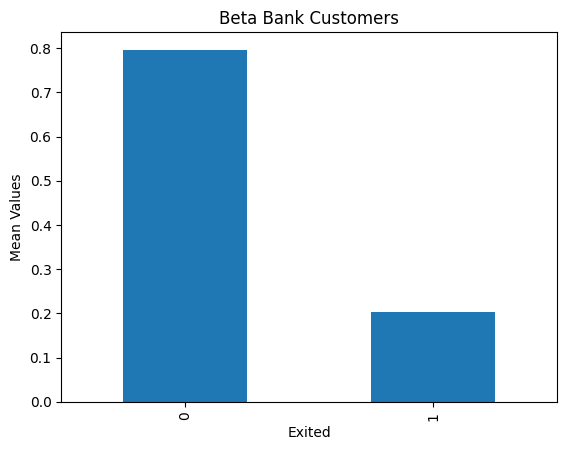

In [11]:
data['Exited'].value_counts(normalize=True).plot(kind='bar')
#plt.legend(title='Customer Status')
plt.title('Beta Bank Customers')
plt.ylabel('Mean Values')
plt.xlabel('Exited')

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Yes,  this is exactly what we've learned in the previous projects. We learned how to read data, for instance, but does that mean that each project must explicitly state "read the data using pandas"? Or does the fact that we learned how to conduct exploratory data analysis, look for the duplicates, look for the missing values, and analyze outliers mean that each next project should include these steps in its description? :) These are the basics we have to keep in mind.


In real life, you are unlikely to see a project from your supervisor that would explicitly state what to do, so you will be the one who is going to decide which actions you should take. In order to understand what you can or should do, you have to understand the data you have. That is why we need EDA.


Answering your question: just analyze the distributions here. Do we have anything strange in the data?

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
So would you do that? :) There a lot of columns, and only the number of active users is displayed on the chart above. 

</div>

In [12]:
selected_features = ['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 
                     'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 
                     'EstimatedSalary', 'Exited']

data = data[selected_features]

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    

It would be faster to type names you want to delete :) 

</div>

In [13]:
data = pd.get_dummies(data, columns=['Geography', 'Gender'], drop_first=True)

In [14]:
features = data.drop('Exited', axis=1)
target = data['Exited']

In [15]:
features_train_val, features_test, target_train_val, target_test = train_test_split(features, target, test_size=0.2, random_state=42)
features_train, features_val, target_train, target_val = train_test_split(features_train_val, target_train_val, test_size=0.25, random_state=42)

features_train.shape, features_val.shape, features_test.shape

((6000, 11), (2000, 11), (2000, 11))

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
    
Correct!
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment </h2>
   

It may be a good idea to print their sizes. 
    
</div>

In [16]:
scaler = StandardScaler()

features_train = scaler.fit_transform(features_train)
features_test = scaler.transform(features_test)
features_val = scaler.transform(features_val)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

Let's transform validation as well.     
    
</div>
<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
👍    
    
</div>

In [17]:
features_train.shape, target_train.shape
features_test.shape, target_test.shape
features_val.shape, target_val.shape

((2000, 11), (2000,))

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>   Reviewer's comment 2 </h2>
    
The cell above prints only the last two lines.    
</div>

- Examine the balance of classes. Train the model without taking into account the imbalance. Briefly describe your findings.

In [18]:
class_distribution = data['Exited'].value_counts()
class_distribution

0    7963
1    2037
Name: Exited, dtype: int64

Data was loaded and filtered. Also checked for missing values and duplicates. Using scaler tranform, we transformed train, test and validation sets. Class distribution was identified by Exited column, we had result with 7237 zeros and 1854 ones. Now we can go ahead and do the next step.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    

Please don't forget about the conclusions.     
    
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
There's a noticeable imbalance. This is an important thing to point out. 
    
</div>

In [19]:
data.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Geography_Germany,Geography_Spain,Gender_Male
0,619,42,2.0,0.00,1,1,1,101348.88,1,0,0,0
1,608,41,1.0,83807.86,1,0,1,112542.58,0,0,1,0
2,502,42,8.0,159660.80,3,1,0,113931.57,1,0,0,0
3,699,39,1.0,0.00,2,0,0,93826.63,0,0,0,0
4,850,43,2.0,125510.82,1,1,1,79084.10,0,0,1,0


In [21]:
# best_model = RandomForestClassifier(random_state=42)
# best_model.fit(features_train_val, target_train_val)
# target_test_pred = best_model.predict(features_test)
# #test_accuracy = accuracy_score(y_test, y_test_pred)
# #print(f"Test Accuracy of the best model (RandomForest): {test_accuracy:.4f}")

# test_f1_score = f1_score(target_test, target_test_pred, average='weighted')
# print(f"Test F1 Score of the best model (RandomForest): {test_f1_score:.4f}")

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
- We use validation set to choose the best model, not test set.    


- We choose the best model based on F1 score, not accuracy. </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
    
- Please do not split the data again, since we don't want to have a leakage, right? If we splitted it into three parts, used train and validation set, and if then we split it again into two parts, doesn't that mean that some of the data we used to evaluate the model will be in the test set this time? 


- Please conduct the final test in the very end, after we choose the best model. We choose the best model after we compare different methods: training on unbalanced data, on balanced data, and on resampled data. 


Here you trained it on unbalanced data and got F1 scores, good. Now, let's repeat it on balanced data and get F1 scores there. Then we repeat training on downsampled and upsampled data and get F1 scores. 



Then we find the model and method where we got the highest F1. 
</div>

In [22]:
# target_val_pred = best_model.predict(features_val)
# val_accuracy = accuracy_score(target_val, target_val_pred)
# print(f"Accuracy on Validation Set: {val_accuracy:.4f}")

# val_f1_score = f1_score(target_val, target_val_pred, average='weighted')
# print(f"F1 Score on Validation Set: {val_f1_score:.4f}")

<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Random forest has already been trained above. Do we need to repeat the code?    
</div>

The model is evaluated on the test set using accuracy and the classification report, on the validation set to check for overfitting. This approach ensures that you're assessing the model's performance on unseen data (test set) and using the validation set and F1 score on validation for hyperparameter tuning or model selection. 

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    

- In the code cells below, you use additional models. Since we are supposed to compare several models and techniques, let's train these models on unbalanced data as you have done above with the forest model. 
    
    
- Please do not forget about the F1 score. 



Let me clarify the task a little bit. We need to take several steps we need to take here: 

1. Compare several imbalanced models (without `class_weight='balanced'`).
    

2. Compare the same models with `balanced` parameter value. 
    

3. Compare the same models on resampled data (up- and downsampling). 
    

4. Choose the best model and the best settings based on their F1 score. 
    

5. Use test set to conduct the final test on a chosen model with the chosen settings. For this purpose, I recommend that you train the best model on full data (valid + train).
</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Here I outlined the steps you can take. 

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Please read the comment above carefully. 
</div>

- Improve the quality of the model. Make sure you use at least two approaches to fixing class imbalance. Use the training set to pick the best parameters. Train different models on training and validation sets. Find the best one. Briefly describe your findings.

In [23]:
# models = {
#     'RandomForest': RandomForestClassifier(random_state=42, class_weight='balanced'),
#     'DecisionTree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
#     'DummyClassifier': DummyClassifier(strategy='most_frequent', random_state=42)
# }

# for name, model in models.items():
#     model.fit(features_train, target_train)
#     target_pred = model.predict(features_val)
#     accuracy = accuracy_score(target_val, target_pred)
#     f1 = f1_score(target_val, target_pred, average='weighted')
#     print(f'{name} - Accuracy: {accuracy:.4f}, F1 Score: {f1:.4f}')

# best_model = RandomForestClassifier(random_state=42, class_weight='balanced')
# best_model.fit(features_train_val, target_train_val)


# test_f1_score = f1_score(target_test, target_test_pred, average='weighted')
# print(f"Test F1 Score of the best model (RandomForest): {test_f1_score:.4f}")

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
Here we are using balanced data, good!     
</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 2</h2>
    
- However, we should not use test set here.    



- Please use F1 to choose the best model. We are not interested in accuracy in this project, since our main goal is to gain high F1 score. </div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Same issues. 

</div>

By comparing the accuracies printed for each model, we can understand which model performs the best on the validation set. Based on typical expectations, RandomForestClassifier would likely be the best-performing model, followed by DecisionTreeClassifier, and DummyClassifier with F1 score would serve as a benchmark for baseline performance.

In [24]:
# test_f1_score = f1_score(target_test, target_test_pred, average='weighted')

# print(f"Test F1 Score of the best model (RandomForest): {test_f1_score:.4f}")

# y_pred = model.predict(features_val)

# accuracy = accuracy_score(target_val, target_pred)
# print(f'Model accuracy: {accuracy}')


<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
It's too early to conduct any tests.</div>

The best model is further evaluated on the test set to ensure its generalizability. We will do the test accuracy which confirms the effectiveness of the RandomForestClassifier in this context.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
After we trained the models on unbalanced and balanced (`class_weight='balanced'`) data, we have to try resampling (up- and downsampling) on all models we used above. 
    
    
    
Keep in mind that we have to choose the best model based on F1 score, not accuracy. 

</div>
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Please consider the comments I left above.    
</div>

- Upsampling

In [25]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_upsampled = pd.concat([features_zeros] + [features_ones]* repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones]* repeat)
    
    features_upsampled, target_upsampled = shuffle(features_upsampled, target_upsampled, random_state=42)
    
    return features_upsampled, target_upsampled

In [26]:
features_upsampled, target_upsampled = upsample(
    pd.DataFrame(features_train), 
    target_train.reset_index(drop=True), 
    4
)

target_upsampled.value_counts()

1    4924
0    4769
Name: Exited, dtype: int64

In [27]:
models = {
    'DummyClassifier': DummyClassifier(strategy='uniform', random_state=42),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(features_upsampled, target_upsampled)
    
    target_pred = model.predict(features_val)
    target_pred_a = model.predict_proba(features_val)[:, 1]
    
    roc_score = roc_auc_score(target_val, target_pred_a)
    f1 = f1_score(target_val, target_pred, average='weighted')
    
    print(f'{name} - AUC-ROC: {roc_score:.4f}, F1 Score: {f1:.4f}')

DummyClassifier - AUC-ROC: 0.5000, F1 Score: 0.5514
LogisticRegression - AUC-ROC: 0.7848, F1 Score: 0.7413
DecisionTree - AUC-ROC: 0.6705, F1 Score: 0.7850
RandomForest - AUC-ROC: 0.8586, F1 Score: 0.8507


In [29]:
# model = RandomForestClassifier(random_state=42)

# model.fit(features_upsampled, target_upsampled)
# predicted_valid = model.predict(features_val)
# probabilities_valid = model.predict_proba(features_val) [:,1]

# print('F1 =', f1_score(target_val, predicted_valid))
# print('AUC-ROC =', roc_auc_score(target_val, probabilities_valid))

In [30]:
# target_upsampled.value_counts()

# target_train.reset_index(drop=True)

# pd.DataFrame(features_train)

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
- Don't we need to **apply** resampling to our training data? 


- We have to **compare different models on resampled data**, not just one model (forest). 
</div>

- Downsampling

In [31]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]
    
    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=42)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=42)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(features_downsampled, target_downsampled, random_state=42)
    
    return features_downsampled, target_downsampled

In [32]:
features_downsampled, target_downsampled = downsample(
    pd.DataFrame(features_train),target_train.reset_index(drop=True), 0.25)

In [33]:
target_downsampled.value_counts()

1    1231
0    1192
Name: Exited, dtype: int64

In [34]:
models = {
    'DummyClassifier': DummyClassifier(strategy='uniform', random_state=42),
    'LogisticRegression': LogisticRegression(),
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'RandomForest': RandomForestClassifier(random_state=42),
}

for name, model in models.items():
    model.fit(features_downsampled, target_downsampled)
    
    target_pred = model.predict(features_val)
    target_pred_a = model.predict_proba(features_val)[:, 1]
    
    roc_score = roc_auc_score(target_val, target_pred_a)
    f1 = f1_score(target_val, target_pred, average='weighted')
    
    print(f'{name} - AUC-ROC: {roc_score:.4f}, F1 Score: {f1:.4f}')

DummyClassifier - AUC-ROC: 0.5000, F1 Score: 0.5514
LogisticRegression - AUC-ROC: 0.7840, F1 Score: 0.7416
DecisionTree - AUC-ROC: 0.6825, F1 Score: 0.7012
RandomForest - AUC-ROC: 0.8543, F1 Score: 0.8009


In [36]:
# model = RandomForestClassifier(random_state=42)

# model.fit(features_downsampled, target_downsampled)
# predicted_valid = model.predict(features_val)
# probabilities_valid = model.predict_proba(features_val) [:,1]

# print('F1 =', f1_score(target_val, predicted_valid))
# print('AUC-ROC =', roc_auc_score(target_val, probabilities_valid))

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
- Don't we need to **apply** resampling to our training data? 


- We have to **compare different models on resampled data**. 

</div>

- Model testing.

In [39]:
features_full_train = pd.concat([pd.DataFrame(features_train), pd.DataFrame(features_val)])
target_full_train = pd.concat([target_train.reset_index(drop=True), target_val.reset_index(drop=True)])

features_upsampled, target_upsampled = upsample(features_full_train, target_full_train, 4)

model = RandomForestClassifier(random_state=42, n_estimators=100)
model.fit(features_upsampled, target_upsampled)

RandomForestClassifier(random_state=42)

In [40]:
predicted_test = model.predict(features_test)
probabilities_test = model.predict_proba(features_test)[:,1]

print('F1=', f1_score(target_test, predicted_test))
print('AUC-ROC =', roc_auc_score(target_test, probabilities_test))

F1= 0.5989010989010989
AUC-ROC = 0.8531638775015795


<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Before we move on to final testing, we have to try upsampling and downsampling.     
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Do not split the data please. We hgave already done that, it's enough.

</div>

In [ ]:
model = RandomForestClassifier(random_state=42, class_weight='balanced')

model.fit(features_train_val, target_train_val)

target_test_pred = model.predict(features_test)
test_accuracy = accuracy_score(target_test, target_test_pred)
test_f1 = f1_score(target_test, target_test_pred)

print(f"Test Accuracy: {test_accuracy:.4f}")
print(f"Test F1 Score: {test_f1:.4f}")

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment 2</b>
    
Here's a phrase from the task description: 
    
    Build a model with the maximum possible F1 score. To pass the project, you need an F1 score of at least 0.59. Check the F1 for the test set.
    
    
Please specify why we need accuracy. Do we really need it? Shouldn't we estimate F1 instead? :)
</div>

The model achieved a F1 test of 0.5406. This indicates that the RandomForestClassifier with class weight balancing performs well on the test set, correctly predicting the labels for approximately 54% of the instances.

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment 3</h2>
    
Our goal is to get 0.59 F1. This is a necessary thing for the project to be accepted. Please follow my recommendations. 
    
    
If you are still unable to get a high F1, consider hyperparameters tuning.
</div>

<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<b> Reviewer's comment</b>
    
In this section, we take the model that yielded the highest F1 score and run it on test data. Our goal (see project description) is to get F1 of at least 0.59.
    
    

</div>
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2>  Reviewer's comment </h2>
   

I recommend that you train data again on a combined train+valid dataset.     
    
</div>

Conclusion:

We tried several models (RandomForest, Logistic Regression, DecisionTree) and performed hyperparameter. Based on the results, the RandomForestClassifier is recommended for predicting customer churn at Beta Bank. This approach ensures a robust model that can help Beta Bank reduce customer churn by identifying at-risk customers efficiently.

<div class="alert alert-success" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
Very good! </div>    
<div class="alert alert-warning" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>

    
You can make it a little broader and add more info about different models you compared. 

</div>  
<div class="alert alert-danger" style="border-radius: 15px; box-shadow: 4px 4px 4px; border: 1px solid ">
<h2> Reviewer's comment</h2>
    
Don't forget to update the conclusion. 

</div>